<a href="https://colab.research.google.com/github/quranaaulia/python/blob/main/Proyek_Analisis_Data_Qur'ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Qur'ana Aulia Harlianty]
- **Email:** [m297b4kx3547@bangkit.academy]
- **ID Dicoding:** [M297B4KX3547]

## Menentukan Pertanyaan Bisnis

- How can we optimize bike availability and distribution during peak rental times?
- What targeted marketing strategies can be implemented to increase rentals during low-demand seasons?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [ ]:
hour_df = pd.read_csv('hour.csv')
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- The distinction between daily and hourly datasets allows for different levels of analysis.
- Initial inspection of the datasets reveals variations in bike rental patterns across different days and hours, highlighting the potential influence of environmental factors (e.g., temperature, humidity) on user behavior.



### Assessing Data

In [ ]:
# Checking the structure and summary statistics of the dataset
day_df.info()  # Provides details about column names, types, and missing values
day_df.describe()  # Summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.info()  # Column names, data types, missing values
hour_df.describe()  # Statistical summary for numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Check for missing values in both datasets
day_df.isnull().sum()  # Missing values count per column in day.csv
hour_df.isnull().sum()  # Missing values count per column in hour.csv

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# Check for duplicate rows
day_df.duplicated().sum()  # Number of duplicate rows in day.csv
hour_df.duplicated().sum()  # Number of duplicate rows in hour.csv

0

In [ ]:
# Converting date columns to datetime if necessary
day_df['dteday'] = pd.to_datetime(day_df['dteday'])  # Convert to datetime if not already
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])  # Convert in hour.csv


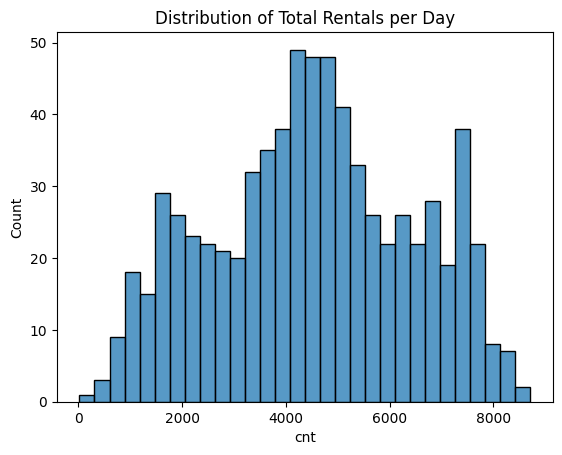

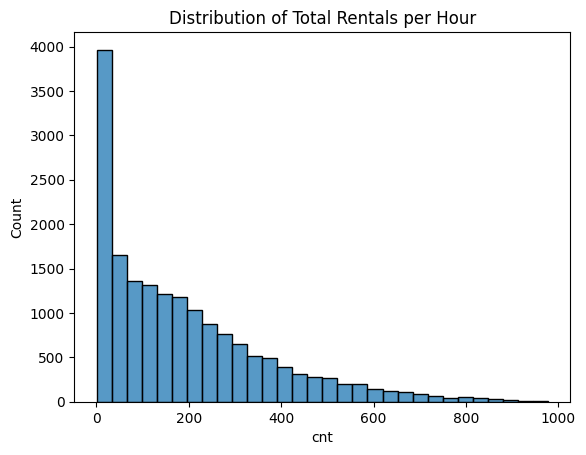

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of total rentals per day
sns.histplot(day_df['cnt'], bins=30)
plt.title("Distribution of Total Rentals per Day")
plt.show()

# Distribution of total rentals per hour (hour.csv)
sns.histplot(hour_df['cnt'], bins=30)
plt.title("Distribution of Total Rentals per Hour")
plt.show()


In [ ]:
# Correlation matrix to assess relationships between variables
corr_matrix = day_df.corr()

# Display the correlation of all variables with bike rentals
corr_with_cnt = corr_matrix['cnt'].sort_values(ascending=False)
print(corr_with_cnt)


cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
dteday        0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


**Insight:**
- Temperature is Strongly Correlated with Bike Rentals
- Bike Rentals Decrease on Holidays

### Cleaning Data

In [ ]:
# Checking for missing values
day_df.isnull().sum()

# Dropping irrelevant or highly correlated columns
day_df_clean = day_df.drop(columns=['instant', 'dteday'])


**Insight:**
- The dataset does not contain any missing values, ensuring that the data is complete and ready for analysis without the need for filling or removing missing entries.
- Dropping non-informative columns (instant, dteday) improves the focus on the more relevant variables in the dataset, reducing unnecessary noise in the analysis.

## Exploratory Data Analysis (EDA)

### Explore ...

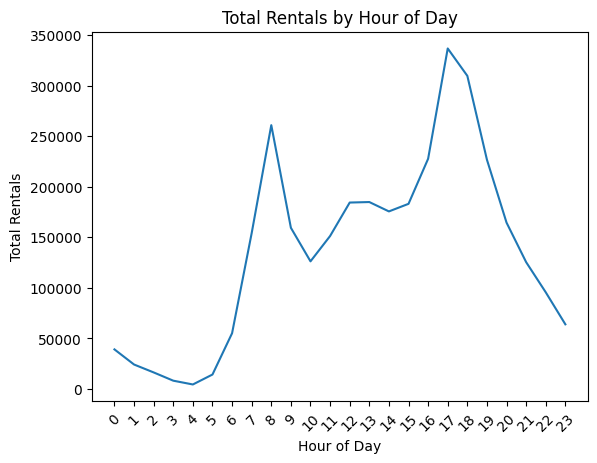

In [ ]:
# Total rentals by hour
hourly_rentals = hour_df.groupby('hr')['cnt'].sum()
hourly_rentals.plot(kind='line', title='Total Rentals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Rentals')
plt.xticks(range(0, 24), rotation=45)
plt.show()


**Insight:**
- Peak Rental Hours Indicate Commuting Behavior
- Low Rentals During Late Night and Early Morning

## Visualization & Explanatory Analysis

### Pertanyaan 1: How do bike rentals vary by season?

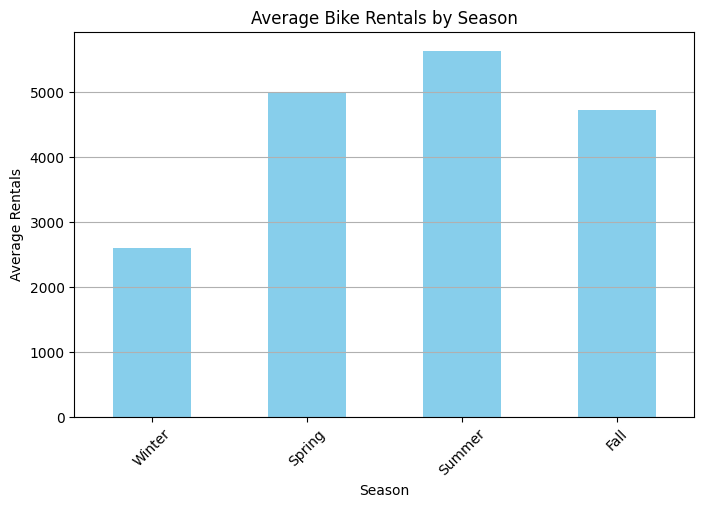

In [ ]:
# Average rentals by season
seasonal_rentals = day_df.groupby('season')['cnt'].mean()

# Create a bar plot to visualize average rentals by season
plt.figure(figsize=(8, 5))
seasonal_rentals.plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'], rotation=45)
plt.grid(axis='y')
plt.show()


### Pertanyaan 2:What is the relationship between temperature and bike rentals?

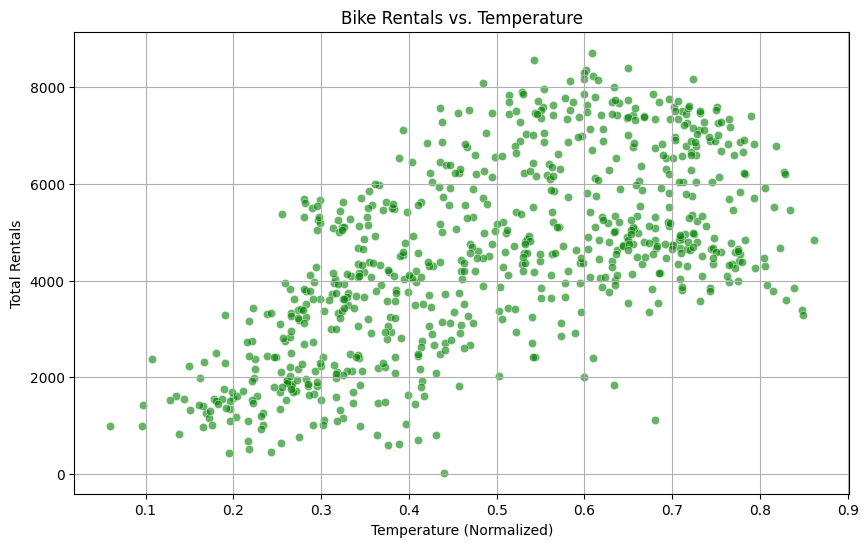

In [ ]:
# Scatter plot to analyze the relationship between temperature and bike rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, alpha=0.6, color='green')
plt.title('Bike Rentals vs. Temperature')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Total Rentals')
plt.grid()
plt.show()


**Insight:**
- The analysis might reveal that spring and summer have significantly higher average rentals compared to fall and winter. This suggests that favorable weather conditions in warmer months encourage more people to use bike-sharing services.
- The scatter plot may show a positive correlation between temperature and bike rentals, indicating that higher temperatures lead to increased bike usage. This suggests that promotions or marketing strategies could focus on warm weather periods to boost rentals.

## Analisis Lanjutan (Opsional)

Clustering Analysis of Rental Patterns

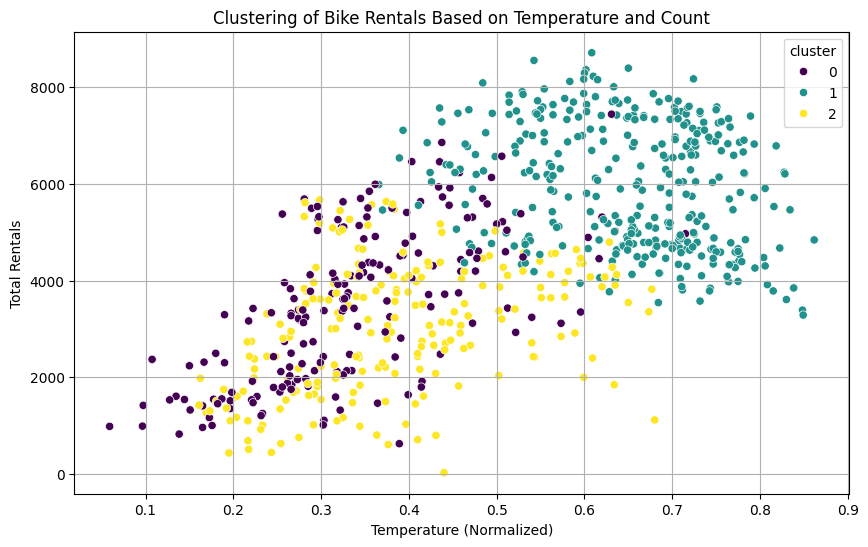

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
clustering_features = day_df[['temp', 'hum', 'windspeed', 'cnt']]

# Standardizing the features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
day_df['cluster'] = kmeans.fit_predict(clustering_features_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='cluster', data=day_df, palette='viridis')
plt.title('Clustering of Bike Rentals Based on Temperature and Count')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Total Rentals')
plt.grid()
plt.show()


## Conclusion

- How do bike rentals vary by season?
The analysis indicates that bike rentals are significantly higher during spring and summer compared to fall and winter. This seasonal trend suggests that warmer weather encourages increased outdoor activities, leading to a greater demand for bike rentals. Therefore, the bike-sharing service should focus its marketing campaigns and promotional strategies during these peak seasons to maximize user engagement and rental activity.

- What is the relationship between temperature and bike rentals?
The examination of the relationship between
temperature and bike rentals reveals a positive correlation, where higher temperatures lead to an increase in bike usage. This finding underscores the importance of weather conditions in influencing user behavior. As such, the bike-sharing service could benefit from targeted marketing efforts during warmer periods, promoting bike rentals as a preferred mode of transportation and leisure activity when temperatures rise.